In [1]:
import torch
from torch.utils.data import Dataset
from torchvision.transforms import Normalize, v2
from torchvision import tv_tensors
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from nanopyx import eSRRF, SRRF

c:\Users\wittd\anaconda3\Lib\site-packages\pytools\persistent_dict.py:63: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


Cupy implementation is not available. Make sure you have the right version of Cupy and CUDA installed.
Optional dependecy Dask_image is not installed. Implementations using it will be ignored.


c:\Users\wittd\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [46]:
def lin_indices(original_length, subsampled_length):
    indices = np.linspace(0, original_length - 1, subsampled_length + 1, dtype=int)
    return indices[1:]

def uniform_biosensor(biosensor, leng):
    indices = lin_indices(biosensor.shape[0], leng)
    return biosensor[indices]
    # downsampled_bio = biosensor[indices]
    # upscaled = torch.nn.functional.interpolate(downsampled_bio.unsqueeze(0), size=(self.mask_size, self.mask_size), mode=self.upscale_mode).squeeze(0)
    # return upscaled
    
def uniform_mask(mask, size):
    interpolated_mask = torch.nn.functional.interpolate(mask.unsqueeze(0).unsqueeze(0).float(), size=(size, size), mode='nearest').squeeze(0).squeeze(0).byte()
    
    return interpolated_mask

In [52]:
data = np.load('C:/onlab_git/Onlab/data_with_centers/42.npz')
# bio = uniform_biosensor(torch.from_numpy(data['biosensor'].astype(np.float32)))
mask = uniform_mask(torch.from_numpy(data['mask'].astype(bool)), 320)
bio = data['biosensor']
bio = uniform_biosensor(bio, 8)
SRRF_bio = SRRF(bio, 4)
eSRRF_bio = eSRRF(bio, 4)
print(bio.shape, upscaled_bio[0].shape)

Agent: ShiftMagnify_catmull_rom using threaded_static ran in 0.012018400011584163 seconds
Agent: Radiality using threaded_dynamic ran in 0.16307499998947605 seconds
Agent: eSRRF_ST using threaded_guided ran in 0.34956569998757914 seconds
(8, 80, 80) (4, 320, 320)


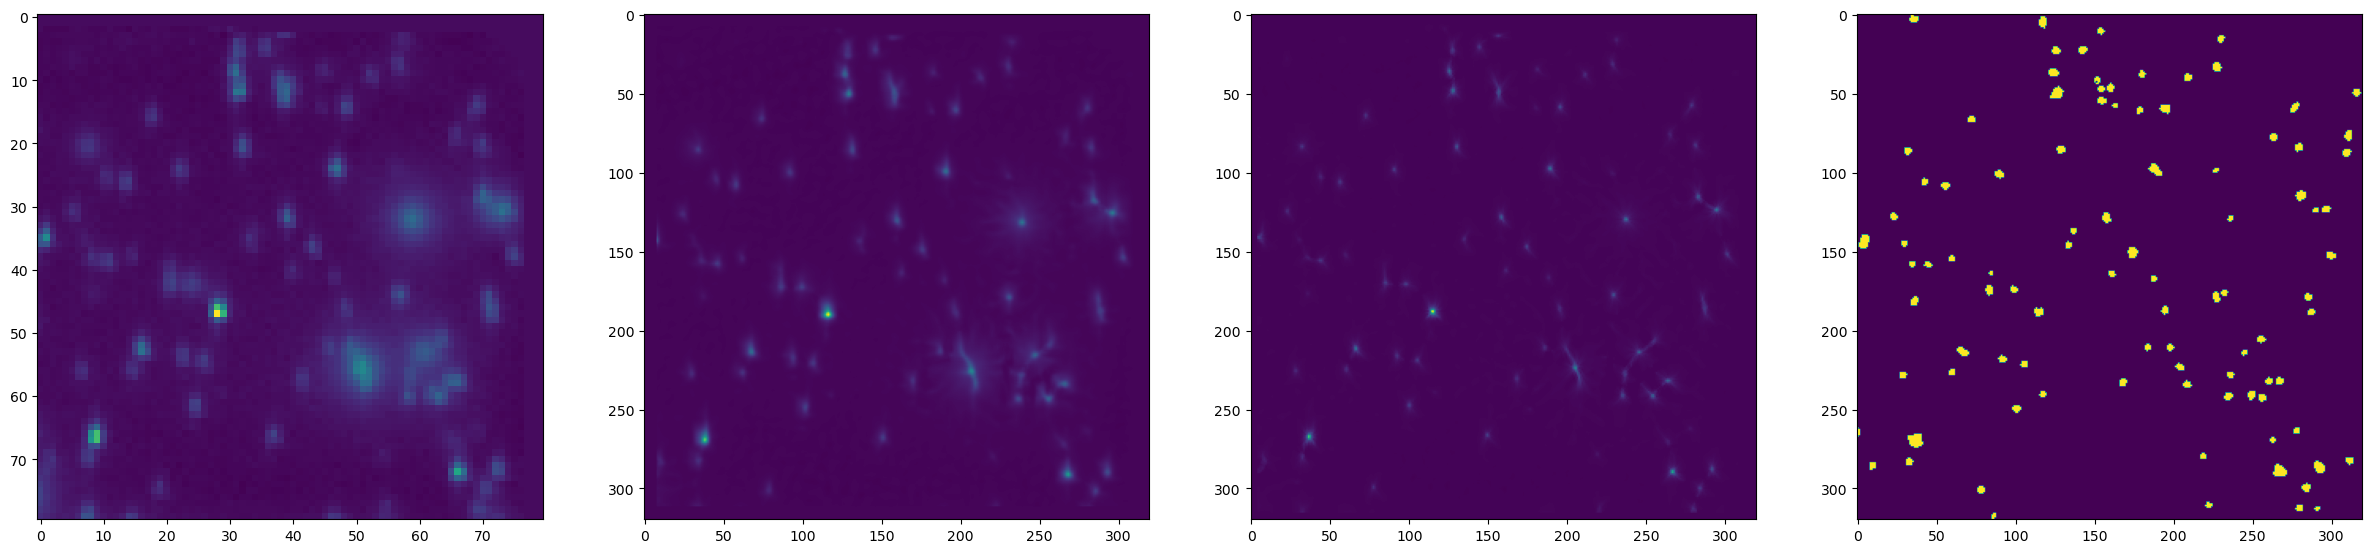

In [56]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 4, 1)
plt.imshow(bio[-1])
plt.subplot(1, 4, 2)
plt.imshow(eSRRF_bio[0][-1])
plt.subplot(1, 4, 3)
plt.imshow(SRRF_bio[0][-1])
plt.subplot(1, 4, 4)
plt.imshow(mask)
plt.show()

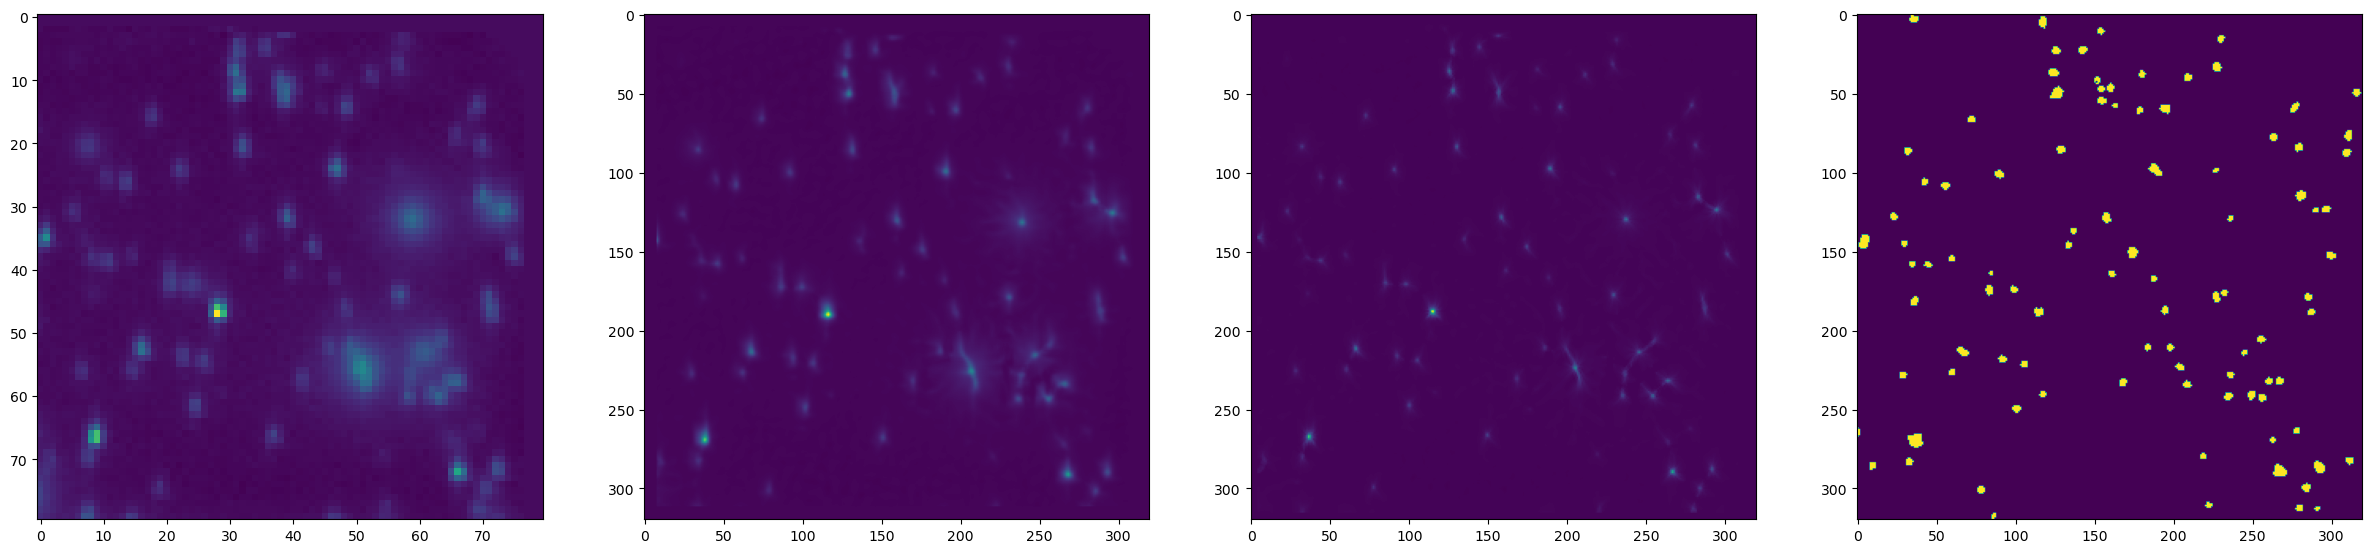

In [60]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 4, 1)
plt.imshow(bio[-1])
plt.subplot(1, 4, 2)
plt.imshow(eSRRF_bio[0][-1])
plt.subplot(1, 4, 3)
plt.imshow(SRRF_bio[0][-1])
plt.subplot(1, 4, 4)
plt.imshow(mask)
plt.show()